   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 23.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.3 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.

2025-05-10 00:30:42.801695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746837043.004460      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746837043.059252      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/8.92k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/16.4M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/5.69k [00:00<?, ?B/s]

quora.py:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/404290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/300 [00:00<?, ? examples/s]

Map:   0%|          | 0/116 [00:00<?, ? examples/s]

Map:   0%|          | 0/716 [00:00<?, ? examples/s]

/tmp/ipykernel_31/1528002214.py:86: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Step,Training Loss
1,7.482300
2,5.934800
3,2.602900
4,7.773800
5,9.914600
6,4.780100
7,5.747200
8,10.432300
9,1.873700
10,4.949800


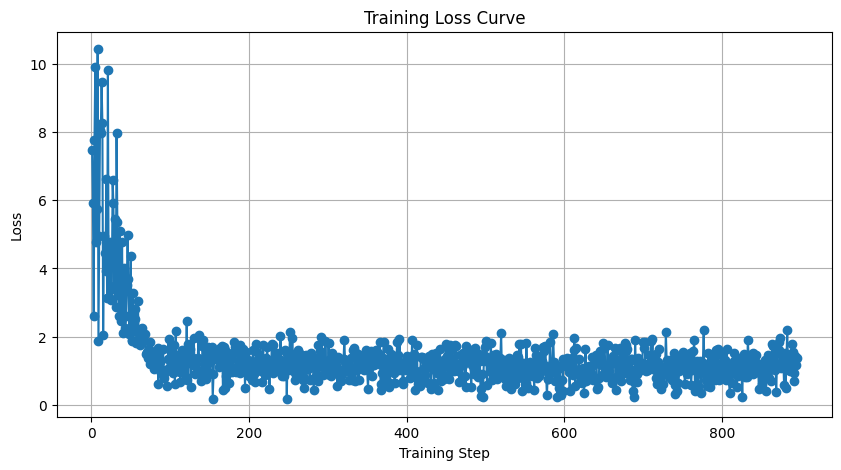

In [1]:
# === 1. Install Dependencies ===
!pip install -q peft transformers datasets accelerate bitsandbytes matplotlib

# === 2. Imports ===
import os
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, TrainerCallback
from datasets import load_dataset, concatenate_datasets
from peft import get_peft_model, LoraConfig, TaskType
import random
import json

# === Disable W&B Logging (Optional) ===
os.environ["WANDB_DISABLED"] = "true"

# === 3. Model Setup ===
model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, torch_dtype=torch.float16, device_map="auto")

# === 4. Apply LoRA ===
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.CAUSAL_LM
)
model = get_peft_model(model, lora_config)

# === 5. Prompt Formatting ===
def format_prompt(example, task):
    if task == "summarization":
        return f"Summarize:\n{example['article']}\n\nSummary: {example['highlights']}"
    elif task == "qa":
        answer = example["answers"]["text"][0] if example["answers"]["text"] else "no answer"
        return f"Context: {example['context']}\nQuestion: {example['question']}\nAnswer: {answer}"
    elif task == "paraphrase":
        return f"Paraphrase:\n{example['questions']['text']}\n\nParaphrase:"
    return ""

# === 6. Load & Format Datasets ===
cnn = load_dataset("cnn_dailymail", "3.0.0", split="train[:300]").map(lambda x: {"text": format_prompt(x, "summarization")})
squad = load_dataset("squad_v2", split="train[:300]").map(lambda x: {"text": format_prompt(x, "qa")})
quora = load_dataset("quora", split="train[:300]",trust_remote_code=True).filter(lambda x: x["is_duplicate"]).map(lambda x: {"text": format_prompt(x, "paraphrase")})

combined_data = concatenate_datasets([cnn, squad, quora])
combined_data = combined_data.shuffle(seed=42)

# === 7. Tokenization with Labels ===
def tokenize(example):
    inputs = tokenizer(example["text"], truncation=True, padding="max_length", max_length=512)
    inputs["labels"] = inputs["input_ids"].copy()
    return inputs

tokenized = combined_data.map(tokenize, batched=True)
tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# === 8. Custom Callback to Log Loss ===
class LossLogger(TrainerCallback):
    def __init__(self):
        self.losses = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None and "loss" in logs:
            self.losses.append((state.global_step, logs["loss"]))

loss_tracker = LossLogger()

# === 9. Training Arguments ===
training_args = TrainingArguments(
    output_dir="./student-lora",
    per_device_train_batch_size=4,
    num_train_epochs=5,
    logging_dir="./logs",
    logging_steps=1,
    save_strategy="epoch",
    save_total_limit=1,
    fp16=True,
    report_to="none",  # Disable W&B or other reporting
)

# === 10. Train ===
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized,
    callbacks=[loss_tracker],
    tokenizer=tokenizer,
)

trainer.train()

# === 11. Save Model ===
model.save_pretrained("student-lora")
tokenizer.save_pretrained("student-lora")

# === 12. Plot Loss Curve ===
steps, losses = zip(*loss_tracker.losses)
plt.figure(figsize=(10, 5))
plt.plot(steps, losses, marker="o")
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

# === 13. Save loss log to file (optional) ===
with open("train_log.json", "w") as f:
    json.dump(loss_tracker.losses, f)

In [8]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_dataset
from tqdm import tqdm
import json
import os

# === 1. Load Fine-Tuned Student Model ===
model_dir = "student-lora"
tokenizer = AutoTokenizer.from_pretrained(model_dir, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_dir, trust_remote_code=True, torch_dtype=torch.float16).to("cuda").eval()

# === 2. Clean Prompt Outputs ===
def clean_prediction(pred, task):
    if task == "summarization":
        return pred.split("Summary:")[-1].strip() if "Summary:" in pred else pred.strip()
    elif task == "qa":
        return pred.split("Answer:")[-1].strip() if "Answer:" in pred else pred.strip()
    elif task == "paraphrase":
        return pred.replace("Paraphrase:", "").strip()
    return pred.strip()

# === 3. Inference Function ===
def generate_output(prompt, max_new_tokens=128):
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512).to(model.device)
    with torch.no_grad():
        outputs = model.generate(**inputs, max_new_tokens=max_new_tokens)
    torch.cuda.empty_cache()
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# === 4. Summarization: CNN/DailyMail ===
summ_data = load_dataset("cnn_dailymail", "3.0.0", split="test[:100]")
summ_outputs = []
for item in tqdm(summ_data, desc="Summarization"):
    prompt = f"Summarize:\n{item['article']}\n\nSummary:"
    output = generate_output(prompt)
    summ_outputs.append({
        "id": item["id"],
        "reference": item["highlights"],
        "prediction": output,
        "clean_prediction": clean_prediction(output, "summarization")
    })
with open("student_summarization_outputs.json", "w") as f:
    json.dump(summ_outputs, f, indent=2)

# === 5. QA: SQuAD v2 ===
qa_data = load_dataset("squad_v2", split="validation[:100]")
qa_outputs = []
for item in tqdm(qa_data, desc="QA"):
    prompt = f"Context: {item['context']}\nQuestion: {item['question']}\nAnswer:"
    output = generate_output(prompt)
    qa_outputs.append({
        "id": item["id"],
        "reference": item["answers"],
        "prediction": output,
        "clean_prediction": clean_prediction(output, "qa")
    })
with open("student_qa_outputs.json", "w") as f:
    json.dump(qa_outputs, f, indent=2)

# === 6. Paraphrasing: Quora ===
quora_data = load_dataset("quora", split="train[300:400]").filter(lambda x: x["is_duplicate"])
para_outputs = []
for item in tqdm(quora_data, desc="Paraphrasing"):
    prompt = f"Paraphrase:\n{item['questions']['text']}\n\nParaphrase:"
    output = generate_output(prompt)
    para_outputs.append({
        "reference": item["questions"]["text"],
        "prediction": output,
        "clean_prediction": clean_prediction(output, "paraphrase")
    })
with open("student_paraphrase_outputs.json", "w") as f:
    json.dump(para_outputs, f, indent=2)

QA: 100%|██████████| 100/100 [00:23<00:00,  4.31it/s]


Filter:   0%|          | 0/100 [00:00<?, ? examples/s]

Paraphrasing: 100%|██████████| 34/34 [00:01<00:00, 27.75it/s]


In [4]:
!pip install evaluate --quiet

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.9 MB/s eta 0:00:00


In [5]:
pip install rouge_score bert_score sacrebleu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 8.4 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=576c0ae911fc83f0942ae69f027e443c7e2877885b7eb74cc84a22b401628ef5
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score
Note: you may need to restart the kernel to use updated packages.


In [9]:
import json
from datasets import load_dataset
from tqdm import tqdm
import evaluate  # This is the new official way

# Load metrics using evaluate (not datasets)
rouge = evaluate.load("rouge")
bertscore = evaluate.load("bertscore")
bleu = evaluate.load("sacrebleu")
meteor = evaluate.load("meteor")

# === Load Predictions ===
with open("/kaggle/working/student_summarization_outputs.json") as f:
    summarization_preds = json.load(f)

with open("/kaggle/working/student_qa_outputs.json") as f:
    qa_preds = json.load(f)

with open("/kaggle/working/student_paraphrase_outputs.json") as f:
    paraphrase_preds = json.load(f)

# === 1. Summarization Evaluation ===
ref_sum = [item["reference"] for item in summarization_preds]
pred_sum = [item["clean_prediction"] for item in summarization_preds]

print("=== Summarization Metrics ===")
print(rouge.compute(predictions=pred_sum, references=ref_sum, use_stemmer=True)['rougeL'])

# === 2. QA Evaluation ===
ref_qa = [item["reference"]["text"][0] if item["reference"]["text"] else "no answer" for item in qa_preds]
pred_qa = [item["clean_prediction"] for item in qa_preds]

print("\n=== Question Answering Metrics ===")
print("ROUGE-L:", rouge.compute(predictions=pred_qa, references=ref_qa, use_stemmer=True)['rougeL'])

bert = bertscore.compute(predictions=pred_qa, references=ref_qa, lang="en")
print(f"BERTScore (F1): {sum(bert['f1']) / len(bert['f1']):.4f}")

# === 3. Paraphrase Generation Evaluation ===
ref_para = [item["reference"] for item in paraphrase_preds]
pred_para = [item["clean_prediction"] for item in paraphrase_preds]

print("\n=== Paraphrase Generation Metrics ===")
print("SacreBLEU:", bleu.compute(predictions=pred_para, references=[[r] for r in ref_para])['score'])
print("METEOR:", meteor.compute(predictions=pred_para, references=ref_para)['meteor'])

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


=== Summarization Metrics ===
0.13092737001384258

=== Question Answering Metrics ===
ROUGE-L: 0.36232142857142857


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore (F1): 0.8641

=== Paraphrase Generation Metrics ===
SacreBLEU: 100.00000000000004
METEOR: 0.7976939281863692
